In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob,os
from transport_scripts import ADMR
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib import cm, colors
import ipywidgets as widgets
from IPython.display import display
#from scipy.interpolate import interp1d

In [1]:
reload(ADMR)

NameError: name 'ADMR' is not defined

<IPython.core.display.Javascript object>


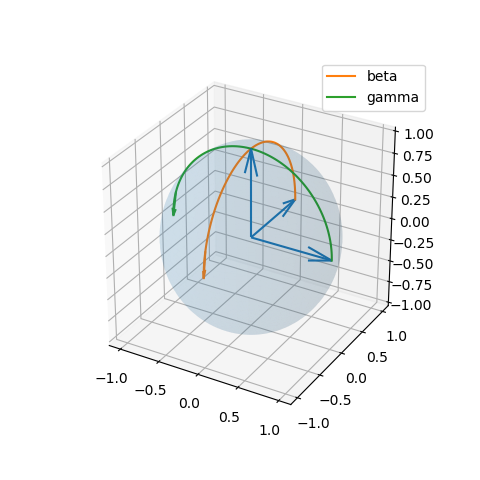

In [41]:
%matplotlib notebook
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111,projection='3d')
phi = np.linspace(0,np.pi,100)
theta = np.linspace(0,2*np.pi,100)
phi, theta = np.meshgrid(phi,theta)
x = np.sin(phi)*np.cos(theta)
y = np.sin(phi)*np.sin(theta)
z = np.cos(phi)
ax.plot_surface(x,y,z,alpha=.1)
ax.quiver(0,0,0,1,0,0)
ax.quiver(0,0,0,0,1,0)
ax.quiver(0,0,0,0,0,1)
theta = np.linspace(-np.pi/2,np.pi/2,100)
x = [0]*len(theta)
y = -np.sin(theta)
z = np.cos(theta)
ax.plot(x,y,z,label='beta')
ax.quiver(x[-10], y[-10], z[-10], x[-1]-x[-10],y[-1]-y[-10], z[-1]-z[-10],color='C1')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
ax.plot(y,x,z,label='gamma')
ax.quiver(y[-10], x[-10], z[-10], y[-1]-y[-10],x[-1]-x[-10], z[-1]-z[-10], color='C2')
plt.legend()

In [168]:
ucphi = np.linspace(-np.pi,0,100)
uctheta = np.linspace(0,2*np.pi,100)
ucphi, uctheta = np.meshgrid(ucphi,uctheta)
ucx = np.sin(ucphi)*np.cos(uctheta)
ucy = np.sin(ucphi)*np.sin(uctheta)
ucz = np.cos(ucphi)

In [256]:
#theta = np.pi/4.
thetas = np.linspace(0,2*np.pi,101)
h = 1500
beta = True
ms = 320.*4*np.pi
meff = 298.*4*np.pi
hcub = -20.
phi0 = np.pi/4.
HH = [ADMR.H(theta,h,beta) for theta in thetas]

In [257]:
f = [[[ADMR.F((uctheta[i][j],p),theta,h,beta,ms,meff,hcub,phi0) for j,p in enumerate(k)] for i,k in enumerate(ucphi)]for theta in thetas]
fnorm = (np.array(f)-np.min(f))/(np.max(f)-np.min(f))
phi = [ucphi.reshape(10000,1)[np.argmin(e)] for e in f]
thetaM = [uctheta.reshape(10000,1)[np.argmin(e)] for e in f]
MM = [ADMR.M(tM,phi[i],ms) for i,tM in enumerate(thetaM)]

In [258]:
angsM,fit = ADMR.calcAngsM(thetas, h, beta, ms, meff, hcub, phi0)
thetaMmin = [a[0] for a in angsM]
phiMin = [a[1] for a in angsM]
MMmin = [ADMR.M(t,phiMin[i],ms) for i,t in enumerate(thetaMmin)]

<IPython.core.display.Javascript object>


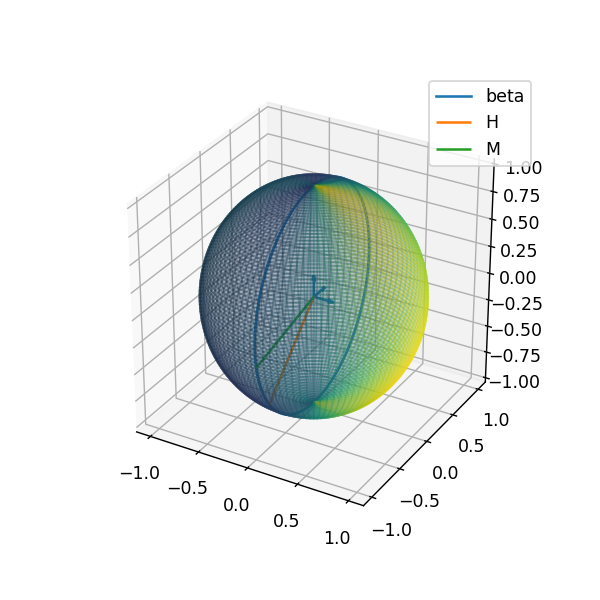

In [259]:
%matplotlib notebook
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111,projection='3d')
i=0

p1 = ax.plot_surface(ucx,ucy,ucz,alpha=.2,rstride=1,cstride=1,facecolors=cm.viridis(fnorm[i]))
ax.quiver(0,0,0,.2,0,0)
ax.quiver(0,0,0,0,.2,0)
ax.quiver(0,0,0,0,0,.2)
z = np.cos(thetas)
x = [0]*len(thetas)
y = -np.sin(thetas)
if beta:
    ax.plot(x,y,z,label='beta')
    ax.quiver(x[-10], y[-10], z[-10], x[-1]-x[-10],y[-1]-y[-10], z[-1]-z[-10],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
else:
    ax.plot(y,x,z,label='gamma')
    ax.quiver(y[-10], x[-10], z[-10], y[-1]-y[-10],x[-1]-x[-10], z[-1]-z[-10],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
hh = ax.quiver(0,0,0,HH[i][0]/h,HH[i][1]/h,HH[i][2]/h,color='C1',label='H')
mm = ax.quiver(0,0,0,MMmin[i][0]/ms,MMmin[i][1]/ms,MMmin[i][2]/ms,color='C2',label='M')
plt.legend()

def quiver_data_to_segments(X, Y, Z, u, v, w):
    segments = (X, Y, Z, X+u, Y+v, Z+w)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update_plot(i, p1, hh, mm):
    #    p1.set_facecolors(cm.viridis(fnorm[i]))
    #hh.set_UVC(HH[i][0]/h, HH[i][1]/h, HH[i][2]/h)
    #mm.set_UVC(MM[i][0]/ms, MM[i][1]/ms, MM[i][2]/ms)
    #p1.remove()
    #p1 = ax.plot_surface(ucx,ucy,ucz,alpha=.2,rstride=1,cstride=1,facecolors=cm.viridis(fnorm[i]))
    hh.set_segments(quiver_data_to_segments(0,0,0,HH[i][0]/h, HH[i][1]/h, HH[i][2]/h))
    mm.set_segments(quiver_data_to_segments(0,0,0,MMmin[i][0]/ms, MMmin[i][1]/ms, MMmin[i][2]/ms))
    return p1,hh,mm

anim = FuncAnimation(fig,update_plot,fargs=(p1,hh,mm),interval=1,blit=False)
plt.show()

The minimization by value is very pixellated, and not completely accurate

<IPython.core.display.Javascript object>


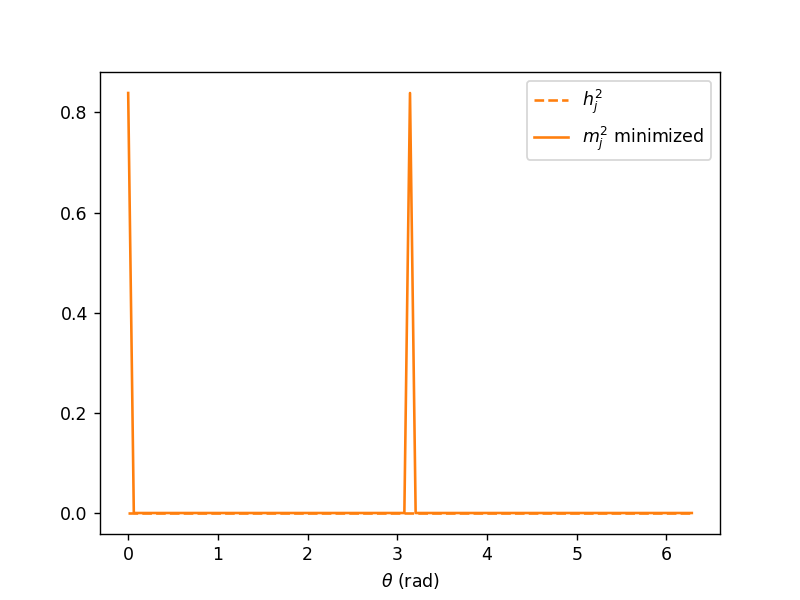

In [260]:
%matplotlib notebook
plt.plot(thetas,[(HHH[0]/h)**2 for HHH in HH],'--C1',label=r'$h_j^2$')
#plt.plot(thetas,[(MMM[0]/ms)**2 for MMM in MM],'.C1',label=r'$m_j^2$')
plt.plot(thetas,[(MMM[0]/ms)**2 for MMM in MMmin],'-C1',label=r'$m_j^2$ minimized')
plt.xlabel(r'$\theta$ (rad)')
plt.legend()

<IPython.core.display.Javascript object>


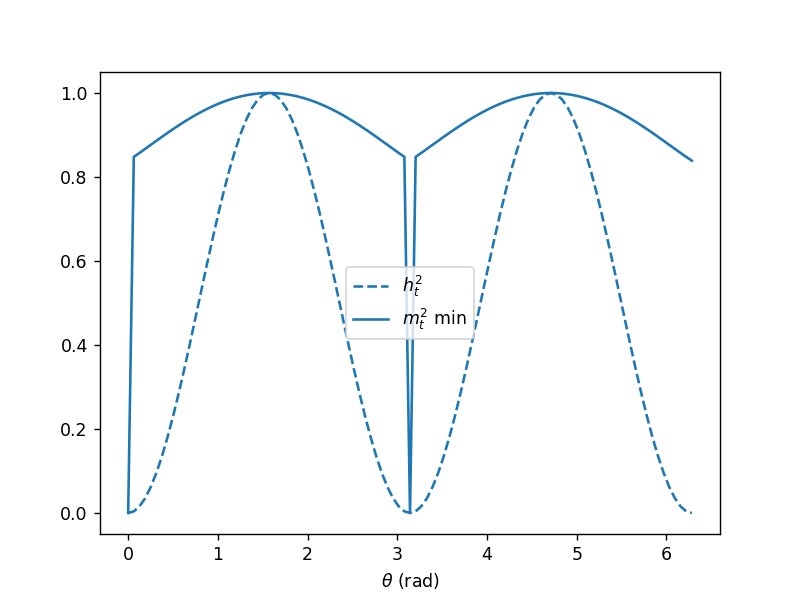

In [261]:
%matplotlib notebook
plt.plot(thetas,[(HHH[1]/h)**2 for HHH in HH],'--C0',label=r'$h_t^2$')
#plt.plot(thetas,[(MMM[1]/ms)**2 for MMM in MM],'.C0',label=r'$m_t^2$')
plt.plot(thetas,[(MMM[1]/ms)**2 for MMM in MMmin],'C0',label=r'$m_t^2$ min')
#plt.plot(thetas,[(HHH[0]/h)**2 for HHH in HH],'--C1',label=r'$h_j^2$')
#plt.plot(thetas,[(MMM[0]/ms)**2 for MMM in MM],'C1',label=r'$m_j^2$')
plt.xlabel(r'$\theta$ (rad)')
plt.legend()

In [330]:
reload(ADMR)

<module 'transport_scripts.ADMR' from 'C:\Users\purni\Dropbox\SuzukiLab-Sync\DataAnalysisPrograms\transport_scripts\ADMR.py'>

<IPython.core.display.Javascript object>


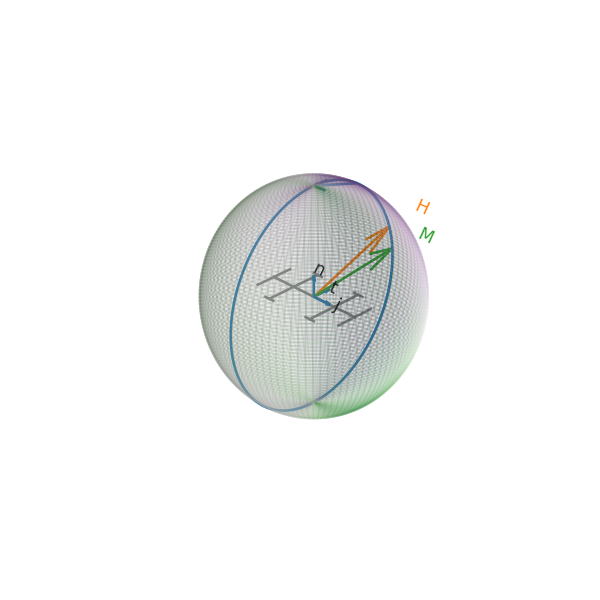

In [262]:
%matplotlib notebook
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111,projection='3d')
i=80

#ax.plot_surface(x,y,z,alpha=.5,rstride=1,cstride=1,facecolors=cm.coolwarm(f),norm=colors.Normalize(vmin=np.min(f),vmax=np.max(f)))
#ax.plot_surface(x,y,z,alpha=.5,rstride=1,cstride=1,cmap = cm.coolwarm)#,norm=colors.Normalize(vmin=np.min(f),vmax=np.max(f)))
#Hall bar
ax.plot(np.linspace(-.5,.5,5),[0]*5,[0]*5,color='grey',zorder=1)
ax.plot([-.5]*5,np.linspace(-.2,.2,5),[0]*5,color='grey',zorder=1)
ax.plot([.5]*5,np.linspace(-.2,.2,5),[0]*5,color='grey',zorder=1)
ax.plot([-.25]*5,np.linspace(-.3,.3,5),[0]*5,color='grey',zorder=1)
ax.plot([.25]*5,np.linspace(-.3,.3,5),[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(.2,.3,5),[-.3]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(.2,.3,5),[.3]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(-.2,-.3,5),[-.3]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(-.2,-.3,5),[.3]*5,[0]*5,color='grey',zorder=1)

#direction vectors
ax.quiver(0,0,0,.2,0,0,zorder=2)
ax.text(.2,0,-.05,'j','x',zorder=2)
ax.quiver(0,0,0,0,.2,0,zorder=2)
ax.text(-.05,.2,-.05,'t','x',zorder=2)
ax.quiver(0,0,0,0,0,.2,zorder=2)
ax.text(-.05,0,.2,'n','x',zorder=2)

#angular rotation arc
z = np.cos(thetas)
x = [0]*len(thetas)
y = -np.sin(thetas)
if beta:
    ax.plot(x,y,z,label=r'$\beta$')
    ax.quiver(x[-10], y[-10], z[-10], x[-1]-x[-10],y[-1]-y[-10], z[-1]-z[-10],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
else:
    ax.plot(y,x,z,label=r'$\gamma$')
    ax.quiver(y[-10], x[-10], z[-10], y[-1]-y[-10],x[-1]-x[-10], z[-1]-z[-10],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)

#H and fitted M
ax.quiver(0,0,0,HH[i][0]/h,HH[i][1]/h,HH[i][2]/h,color='C1',label='H')
ax.text(HH[i][0]*1.3/h,HH[i][1]*1.3/h,HH[i][2]*1.3/h-.05,'H','x',color='C1')
ax.text(MMmin[i][0]*1.3/ms,MMmin[i][1]*1.3/ms,MMmin[i][2]*1.3/ms-.05,'M','x',color='C2')
#ax.quiver(0,0,0,MM[i][0]/ms,MM[i][1]/ms,MM[i][2]/ms,color='C2',label='M')
ax.quiver(0,0,0,MMmin[i][0]/ms,MMmin[i][1]/ms,MMmin[i][2]/ms,color='C2',label='M')

#free energy (surface)
ax.plot_surface(ucx,ucy,ucz,alpha=.1,rstride=1,cstride=1,facecolors=cm.PRGn(fnorm[i]),zorder=1)
ax.view_init(elev=30., azim=-45)
#ax.quiver(y[-10], x[-10], z[-10], y[-1]-y[-10],x[-1]-x[-10], z[-1]-z[-10], color='C2')
ax._axis3don = False
#plt.legend()

In [580]:
print np.argmin(f[80])
print np.argmin(fg[80])
print np.sin(uctheta.reshape(10000,1)[np.argmin(f[80])])*np.sin(ucphi.reshape(10000,1)[np.argmin(f[80])])
print 
print np.sin(uctheta.reshape(10000,1)[np.argmin(fg[80])])*np.cos(ucphi.reshape(10000,1)[np.argmin(fg[80])])

8249
8200
[-0.88134241]

[-0.88145336]


In [263]:
#theta = np.pi/4.
#thetas = np.linspace(-np.pi/2,np.pi/2,100)
#h = 500
betag = False
#ms = 320.
#meff = 298.
#hcub = -20.
#phi0 = np.pi/4.
HHg = [ADMR.H(theta,h,betag) for theta in thetas]

In [264]:
fg = [[[ADMR.F((uctheta[i][j],p),theta,h,betag,ms,meff,hcub,phi0) for j,p in enumerate(k)] for i,k in enumerate(ucphi)]for theta in thetas]
fnormg = (np.array(fg)-np.min(fg))/(np.max(fg)-np.min(fg))
phig = [ucphi.reshape(10000,1)[np.argmin(e)] for e in fg]
thetaMg = [uctheta.reshape(10000,1)[np.argmin(e)] for e in fg]
MMg = [ADMR.M(tM,phig[i],ms) for i,tM in enumerate(thetaMg)]

In [265]:
angsMg,fitg = ADMR.calcAngsM(thetas, h, betag, ms, meff, hcub, phi0)
thetaMming = [a[0] for a in angsMg]
phiMing = [a[1] for a in angsMg]
MMming = [ADMR.M(t,phiMing[i],ms) for i,t in enumerate(thetaMming)]

<IPython.core.display.Javascript object>


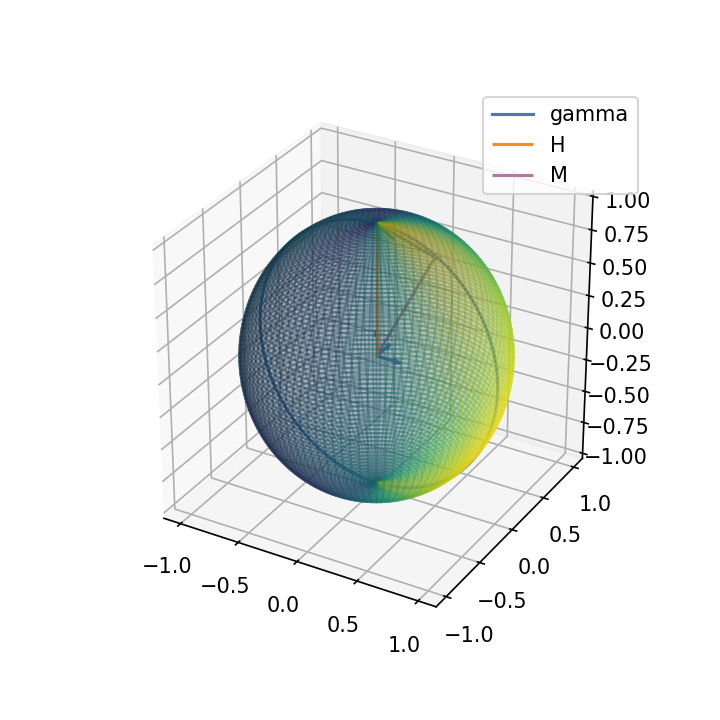

In [296]:
%matplotlib notebook
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111,projection='3d')
i=0

p1 = ax.plot_surface(ucx,ucy,ucz,alpha=.2,rstride=1,cstride=1,facecolors=cm.viridis(fnormg[i]))
ax.quiver(0,0,0,.2,0,0)
ax.quiver(0,0,0,0,.2,0)
ax.quiver(0,0,0,0,0,.2)
z = np.cos(thetas)
x = [0]*len(thetas)
y = -np.sin(thetas)
if betag:
    ax.plot(x,y,z,label='beta')
    ax.quiver(x[-10], y[-10], z[-10], x[-1]-x[-10],y[-1]-y[-10], z[-1]-z[-10],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
else:
    ax.plot(y,x,z,label='gamma')
    ax.quiver(y[-10], x[-10], z[-10], y[-1]-y[-10],x[-1]-x[-10], z[-1]-z[-10],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
hh = ax.quiver(0,0,0,HHg[i][0]/h,HHg[i][1]/h,HHg[i][2]/h,color='C1',label='H')
mm = ax.quiver(0,0,0,MMming[i][0]/ms,MMming[i][1]/ms,MMming[i][2]/ms,color='C2',label='M')
plt.legend()

def quiver_data_to_segments(X, Y, Z, u, v, w):
    segments = (X, Y, Z, X+u, Y+v, Z+w)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update_plot(i, p1, hh, mm):
    #    p1.set_facecolors(cm.viridis(fnorm[i]))
    #hh.set_UVC(HH[i][0]/h, HH[i][1]/h, HH[i][2]/h)
    #mm.set_UVC(MM[i][0]/ms, MM[i][1]/ms, MM[i][2]/ms)
    #p1.remove()
    #p1 = ax.plot_surface(ucx,ucy,ucz,alpha=.2,rstride=1,cstride=1,facecolors=cm.viridis(fnorm[i]))
    hh.set_segments(quiver_data_to_segments(0,0,0,HHg[i][0]/h, HHg[i][1]/h, HHg[i][2]/h))
    mm.set_segments(quiver_data_to_segments(0,0,0,MMming[i][0]/ms, MMming[i][1]/ms, MMming[i][2]/ms))
    return p1,hh,mm

anim = FuncAnimation(fig,update_plot,fargs=(p1,hh,mm),interval=1,blit=False)
plt.show()

<IPython.core.display.Javascript object>


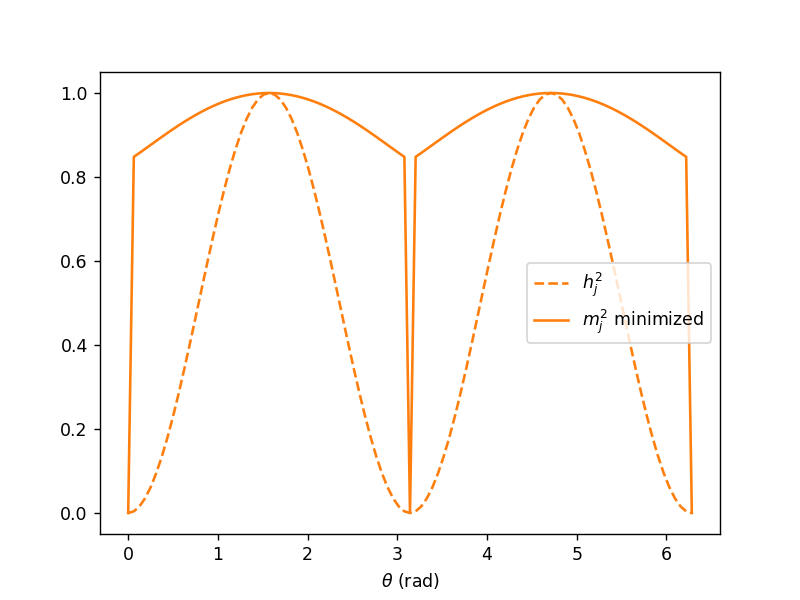

In [267]:
%matplotlib notebook
plt.plot(thetas,[(HHH[0]/h)**2 for HHH in HHg],'--C1',label=r'$h_j^2$')
#plt.plot(thetas,[(MMM[0]/ms)**2 for MMM in MMg],'.C1',label=r'$m_j^2$')
plt.plot(thetas,[(MMM[0]/ms)**2 for MMM in MMming],'-C1',label=r'$m_j^2$ minimized')
plt.xlabel(r'$\theta$ (rad)')
plt.legend()

<IPython.core.display.Javascript object>


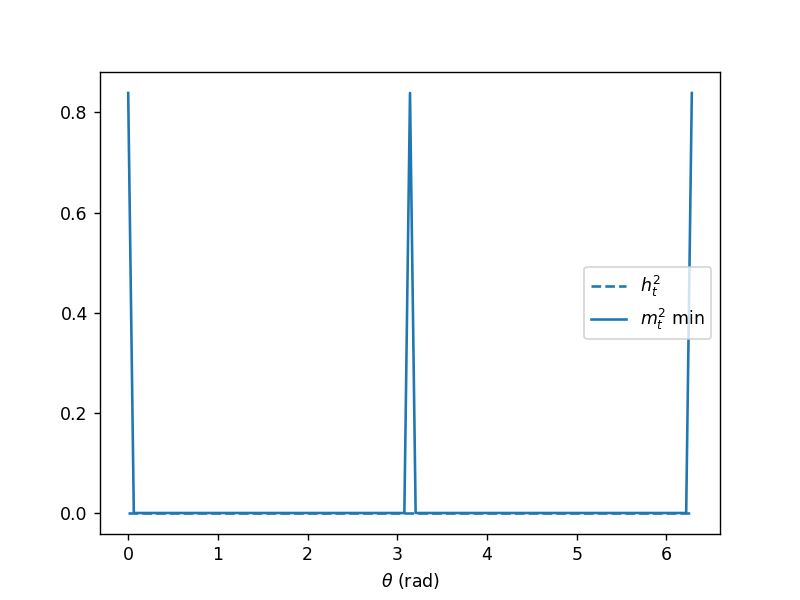

In [268]:
%matplotlib notebook
plt.plot(thetas,[(HHH[1]/h)**2 for HHH in HHg],'--C0',label=r'$h_t^2$')
#plt.plot(thetas,[(MMM[1]/ms)**2 for MMM in MMg],'.C0',label=r'$m_t^2$')
plt.plot(thetas,[(MMM[1]/ms)**2 for MMM in MMming],'C0',label=r'$m_t^2$ min')
#plt.plot(thetas,[(HHH[0]/h)**2 for HHH in HH],'--C1',label=r'$h_j^2$')
#plt.plot(thetas,[(MMM[0]/ms)**2 for MMM in MM],'C1',label=r'$m_j^2$')
plt.xlabel(r'$\theta$ (rad)')
plt.legend()

In [197]:
matlab = np.genfromtxt('../../../../../../DataAnalysisPrograms/transport_scripts/MAngle-OP-Meff0.374T-Hcub-0.0020T-H0.150T.dat',names=True)

<IPython.core.display.Javascript object>


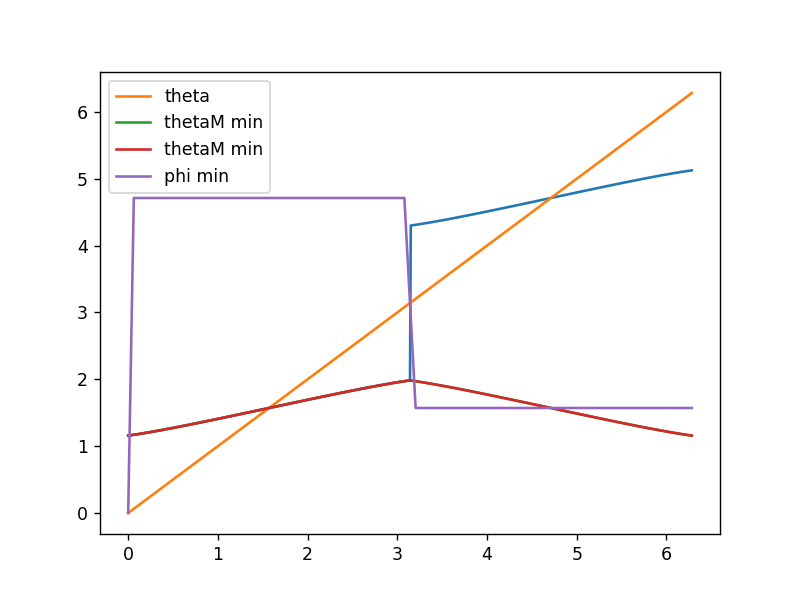

In [271]:
%matplotlib notebook
plt.plot(np.deg2rad(matlab['Hangle']),np.deg2rad(matlab['Mangle']))
plt.plot(thetas,thetas,label='theta')
#plt.plot(-np.concatenate((thetaM[:50],np.array(thetaM[50:])-2*np.pi)),'.',label='thetaM')
plt.plot(thetas,thetaMmin,label='thetaM min')
plt.plot(thetas,thetaMming,label='thetaM min')

#plt.plot(np.array(phi)-np.pi,'.',label='phi')
plt.plot(thetas,np.array(phiMin),label='phi min')
plt.legend()

In [286]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.format'] = 'jpg'
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler('color',["#4e79a7","#f28e2b","#b07aa1","#e15759","#76b7b2", "#59a14f","#edc948","#ff9da7","#9c755f","#bab0ac"])

<IPython.core.display.Javascript object>


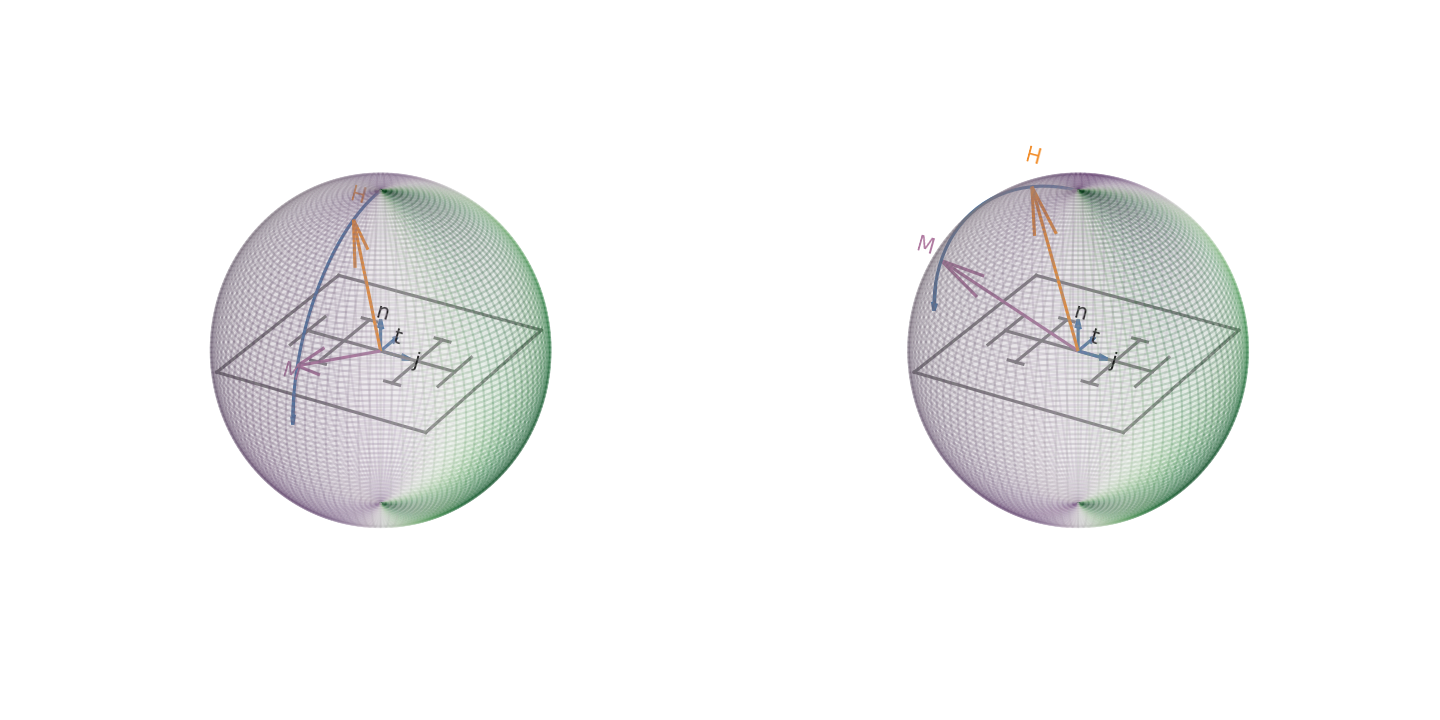

In [298]:
%matplotlib notebook
fig = plt.figure(figsize=plt.figaspect(.5))
ax = fig.add_subplot(121,projection='3d')
i=5
arcend=25
arc=slice(None,arcend)

#ax.plot_surface(x,y,z,alpha=.5,rstride=1,cstride=1,facecolors=cm.coolwarm(f),norm=colors.Normalize(vmin=np.min(f),vmax=np.max(f)))
#ax.plot_surface(x,y,z,alpha=.5,rstride=1,cstride=1,cmap = cm.coolwarm)#,norm=colors.Normalize(vmin=np.min(f),vmax=np.max(f)))
#Hall bar
ax.plot(np.linspace(-.5,.5,5),[0]*5,[0]*5,color='grey',zorder=1)
ax.plot([-.5]*5,np.linspace(-.2,.2,5),[0]*5,color='grey',zorder=1)
ax.plot([.5]*5,np.linspace(-.2,.2,5),[0]*5,color='grey',zorder=1)
ax.plot([-.25]*5,np.linspace(-.3,.3,5),[0]*5,color='grey',zorder=1)
ax.plot([.25]*5,np.linspace(-.3,.3,5),[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(.2,.3,5),[-.3]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(.2,.3,5),[.3]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(-.2,-.3,5),[-.3]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(-.2,-.3,5),[.3]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(-.7,.7,5),[.7]*5,[0]*5,color='grey',zorder=1)
ax.plot(np.linspace(-.7,.7,5),[-.7]*5,[0]*5,color='grey',zorder=1)
ax.plot([.7]*5,np.linspace(-.7,.7,5),[0]*5,color='grey',zorder=1)
ax.plot([-.7]*5,np.linspace(-.7,.7,5),[0]*5,color='grey',zorder=1)

#direction vectors
ax.quiver(0,0,0,.2,0,0,zorder=2)
ax.text(.2,0,-.05,'j','x',zorder=2)
ax.quiver(0,0,0,0,.2,0,zorder=2)
ax.text(-.05,.2,-.05,'t','x',zorder=2)
ax.quiver(0,0,0,0,0,.2,zorder=2)
ax.text(-.05,0,.2,'n','x',zorder=2)

#angular rotation arc
z = np.cos(thetas)
x = [0]*len(thetas)
y = -np.sin(thetas)
if beta:
    ax.plot(x[arc],y[arc],z[arc],label=r'$\beta$')
    ax.quiver(x[arcend-3], y[arcend-3], z[arcend-3], x[arcend]-x[arcend-3],y[arcend]-y[arcend-3], z[arcend]-z[arcend-3],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
else:
    ax.plot(y[arc],x[arc],z[arc],label=r'$\gamma$')
    ax.quiver(y[arcend-3], x[arcend-3], z[arcend-3], y[arcend]-y[arcend-3],x[arcend]-x[arcend-3], z[arcend]-z[arcend-3],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)

#H and fitted M
ax.quiver(0,0,0,HH[i][0]/h,HH[i][1]/h,HH[i][2]/h,color='C1',label='H')
ax.text(HH[i][0]*1.2/h,HH[i][1]*1.2/h,HH[i][2]*1.2/h-.05,'H','x',color='C1')
ax.text(MMmin[i][0]*1.2/ms,MMmin[i][1]*1.2/ms,MMmin[i][2]*1.2/ms-.05,'M','x',color='C2')
#ax.quiver(0,0,0,MM[i][0]/ms,MM[i][1]/ms,MM[i][2]/ms,color='C2',label='M')
ax.quiver(0,0,0,MMmin[i][0]/ms,MMmin[i][1]/ms,MMmin[i][2]/ms,color='C2',label='M')

#free energy (surface)
ax.plot_surface(ucx,ucy,ucz,alpha=.1,rstride=1,cstride=1,facecolors=cm.PRGn(fnorm[i]),zorder=1)
#ax.view_init(elev=30., azim=-45)
#ax.quiver(y[-10], x[-10], z[-10], y[-1]-y[-10],x[-1]-x[-10], z[-1]-z[-10], color='C2')
ax._axis3don = False
#plt.legend()


ax2 = fig.add_subplot(122,projection='3d')
#i=80

#ax.plot_surface(x,y,z,alpha=.5,rstride=1,cstride=1,facecolors=cm.coolwarm(f),norm=colors.Normalize(vmin=np.min(f),vmax=np.max(f)))
#ax.plot_surface(x,y,z,alpha=.5,rstride=1,cstride=1,cmap = cm.coolwarm)#,norm=colors.Normalize(vmin=np.min(f),vmax=np.max(f)))
#Hall bar
ax2.plot(np.linspace(-.5,.5,5),[0]*5,[0]*5,color='grey',zorder=1)
ax2.plot([-.5]*5,np.linspace(-.2,.2,5),[0]*5,color='grey',zorder=1)
ax2.plot([.5]*5,np.linspace(-.2,.2,5),[0]*5,color='grey',zorder=1)
ax2.plot([-.25]*5,np.linspace(-.3,.3,5),[0]*5,color='grey',zorder=1)
ax2.plot([.25]*5,np.linspace(-.3,.3,5),[0]*5,color='grey',zorder=1)
ax2.plot(np.linspace(.2,.3,5),[-.3]*5,[0]*5,color='grey',zorder=1)
ax2.plot(np.linspace(.2,.3,5),[.3]*5,[0]*5,color='grey',zorder=1)
ax2.plot(np.linspace(-.2,-.3,5),[-.3]*5,[0]*5,color='grey',zorder=1)
ax2.plot(np.linspace(-.2,-.3,5),[.3]*5,[0]*5,color='grey',zorder=1)
ax2.plot(np.linspace(-.7,.7,5),[.7]*5,[0]*5,color='grey',zorder=1)
ax2.plot(np.linspace(-.7,.7,5),[-.7]*5,[0]*5,color='grey',zorder=1)
ax2.plot([.7]*5,np.linspace(-.7,.7,5),[0]*5,color='grey',zorder=1)
ax2.plot([-.7]*5,np.linspace(-.7,.7,5),[0]*5,color='grey',zorder=1)

#direction vectors
ax2.quiver(0,0,0,.2,0,0,zorder=2)
ax2.text(.2,0,-.05,'j','x',zorder=2)
ax2.quiver(0,0,0,0,.2,0,zorder=2)
ax2.text(-.05,.2,-.05,'t','x',zorder=2)
ax2.quiver(0,0,0,0,0,.2,zorder=2)
ax2.text(-.05,0,.2,'n','x',zorder=2)

#angular rotation arc
z = np.cos(thetas)
x = [0]*len(thetas)
y = -np.sin(thetas)
if betag:
    ax2.plot(x[arc],y[arc],z[arc],label=r'$\beta$')
    ax2.quiver(x[arcend-3], y[arcend-3], z[arcend-3], x[arcend]-x[arcend-3],y[arcend]-y[arcend-3], z[arcend]-z[arcend-3],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)
else:
    ax2.plot(y[arc],x[arc],z[arc],label=r'$\gamma$')
    ax2.quiver(y[arcend-3], x[arcend-3], z[arcend-3], y[arcend]-y[arcend-3],x[arcend]-x[arcend-3], z[arcend]-z[arcend-3],color='C0')#, shape='full', lw=0, length_includes_head=True, head_width=.05)

#H and fitted M
ax2.quiver(0,0,0,HHg[i][0]/h,HHg[i][1]/h,HHg[i][2]/h,color='C1',label='H')
ax2.text(HHg[i][0]*1.2/h,HHg[i][1]*1.2/h,HHg[i][2]*1.2/h-.05,'H','x',color='C1')
ax2.text(MMming[i][0]*1.2/ms,MMming[i][1]*1.2/ms,MMming[i][2]*1.2/ms-.05,'M','x',color='C2')
#ax2.quiver(0,0,0,MMg[i][0]/ms,MMg[i][1]/ms,MMg[i][2]/ms,color='C2',label='M')
ax2.quiver(0,0,0,MMming[i][0]/ms,MMming[i][1]/ms,MMming[i][2]/ms,color='C2',label='M')

#free energy (surface)
ax2.plot_surface(ucx,ucy,ucz,alpha=.1,rstride=1,cstride=1,facecolors=cm.PRGn(fnormg[i]),zorder=1) #the colors were backwards on this???
#ax2.view_init(elev=30., azim=-45)
#ax.quiver(y[-10], x[-10], z[-10], y[-1]-y[-10],x[-1]-x[-10], z[-1]-z[-10], color='C2')
ax2._axis3don = False

plt.tight_layout(w_pad=0)

In [292]:
plt.savefig('ADMRFreeEnergy')

In [607]:
a,b = angsM[10]

In [609]:
a

-1.3026539315639372

In [610]:
b

-1.570796336178993

In [608]:
angsM[10]

array([-1.30265393, -1.57079634])

In [195]:
thetas = np.linspace(0,2*np.pi,100)
h = 1500
beta = False
ms = 320.*4*np.pi
meff = 298.*4*np.pi
hcub = -20.
phi0 = 0#np.pi/4.

In [185]:
start = timer()
f = [[[ADMR.F((uctheta[i][j],p),theta,h,beta,ms,meff,hcub,phi0) for j,p in enumerate(k)] for i,k in enumerate(ucphi)]for theta in thetas]
phi = [ucphi.reshape(100*100,1)[np.argmin(e)] for e in f]
thetaM = [uctheta.reshape(100*100,1)[np.argmin(e)] for e in f]
end = timer()
HH = [ADMR.H(theta,h,beta) for theta in thetas]
MM = [ADMR.M(tM,phi[i],ms) for i,tM in enumerate(thetaM)]
fnorm = (np.array(f)-np.min(f))/(np.max(f)-np.min(f))
print end-start

16.889068


In [190]:
print matlab

[(  0. ,   0. ) (  0.5,   0.6) (  1. ,   1.2) (  1.5,   1.8)
 (  2. ,   2.5) (  2.5,   3.1) (  3. ,   3.7) (  3.5,   4.3)
 (  4. ,   4.9) (  4.5,   5.5) (  5. ,   6.1) (  5.5,   6.8)
 (  6. ,   7.4) (  6.5,   8. ) (  7. ,   8.6) (  7.5,   9.2)
 (  8. ,   9.8) (  8.5,  10.4) (  9. ,  11. ) (  9.5,  11.6)
 ( 10. ,  12.2) ( 10.5,  12.8) ( 11. ,  13.4) ( 11.5,  14. )
 ( 12. ,  14.6) ( 12.5,  15.2) ( 13. ,  15.8) ( 13.5,  16.4)
 ( 14. ,  17. ) ( 14.5,  17.6) ( 15. ,  18.2) ( 15.5,  18.8)
 ( 16. ,  19.4) ( 16.5,  19.9) ( 17. ,  20.5) ( 17.5,  21.1)
 ( 18. ,  21.7) ( 18.5,  22.3) ( 19. ,  22.8) ( 19.5,  23.4)
 ( 20. ,  24. ) ( 20.5,  24.6) ( 21. ,  25.1) ( 21.5,  25.7)
 ( 22. ,  26.3) ( 22.5,  26.8) ( 23. ,  27.4) ( 23.5,  27.9)
 ( 24. ,  28.5) ( 24.5,  29. ) ( 25. ,  29.6) ( 25.5,  30.2)
 ( 26. ,  30.7) ( 26.5,  31.3) ( 27. ,  31.8) ( 27.5,  32.3)
 ( 28. ,  32.9) ( 28.5,  33.4) ( 29. ,  34. ) ( 29.5,  34.5)
 ( 30. ,  35. ) ( 30.5,  35.6) ( 31. ,  36.1) ( 31.5,  36.6)
 ( 32. ,  37.2) ( 32.5, 

In [186]:
startbasinhopping = timer()
angsM,fit = ADMR.calcAngsM(thetas, h, beta, ms, meff, hcub, phi0)
thetaMmin = np.unwrap([np.mod(a[0],2*np.pi) for a in angsM])
phiMin = np.unwrap([np.mod(a[1],2*np.pi) for a in angsM])
endbasinhopping = timer()
MMmin = [ADMR.M(t,phiMin[i],ms) for i,t in enumerate(thetaMmin)]
print endbasinhopping - startbasinhopping

1.4137474


In [196]:
startdifferentialvolution = timer()
angsM,fit = ADMR.calcAngsM(thetas, h, beta, ms, meff, hcub, phi0)
thetaMmin = [a[0] for a in angsM]
phiMin = [a[1] for a in angsM]
enddifferentialevolution = timer()
MMmin = [ADMR.M(t,phiMin[i],ms) for i,t in enumerate(thetaMmin)]
print enddifferentialevolution - startdifferentialvolution

1.7371522


<IPython.core.display.Javascript object>


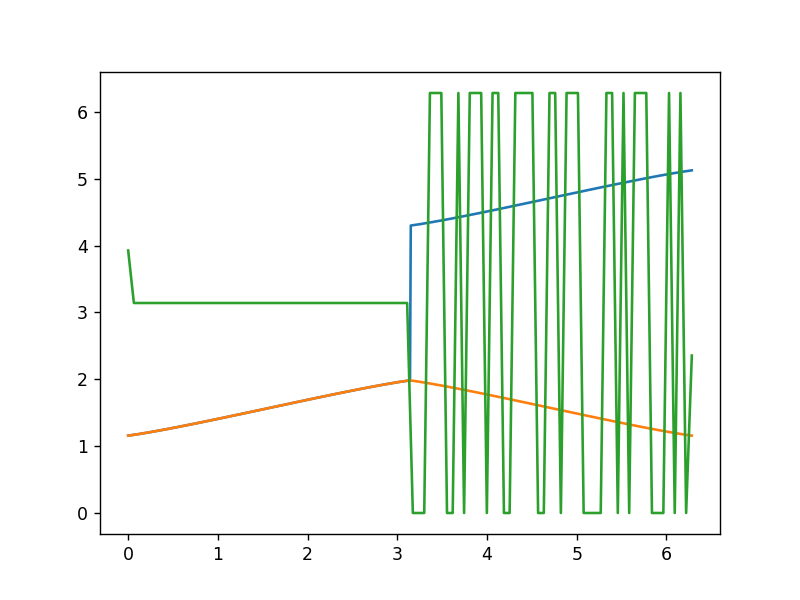

In [198]:
%matplotlib notebook
plt.plot(np.deg2rad(matlab['Hangle']),np.deg2rad(matlab['Mangle']))
#plt.plot(thetas,np.array(thetaM))
#plt.plot(thetas,phi)
plt.plot(thetas,thetaMmin)
plt.plot(thetas,phiMin)

In [194]:
reload(ADMR)

<module 'transport_scripts.ADMR' from 'C:\Users\purni\Dropbox\SuzukiLab-Sync\DataAnalysisPrograms\transport_scripts\ADMR.py'>

In [157]:
i = 360
ADMR.F((thetaMmin[i],phiMin[i]),thetas[i],h,beta,ms,meff,hcub,phi0)

-1200973.8458987665

In [158]:
ADMR.F((np.deg2rad(matlab['Mangle'][i]),0),np.deg2rad(matlab['Hangle'])[i],h,beta,ms,meff,hcub,phi0)

-1193904.9267111856

In [159]:
matlab['Hangle'][360]

180.0

In [160]:
phiMin[360]

2159.0595511620277

In [161]:
from timeit import default_timer as timer

In [278]:
np.rad2deg(thetas[:26])

array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. , 21.6, 25.2, 28.8, 32.4, 36. ,
       39.6, 43.2, 46.8, 50.4, 54. , 57.6, 61.2, 64.8, 68.4, 72. , 75.6,
       79.2, 82.8, 86.4, 90. ])